# Task:2 -Exploratory Data Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('books_data.csv')

In [3]:
df.head()

,title,price,availability,rating
0,A Light in the Attic,£51.77,In stock,Three
1,Tipping the Velvet,£53.74,In stock,One
2,Soumission,£50.10,In stock,One
3,Sharp Objects,£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,£54.23,In stock,Five


# convert rating from text to number

In [4]:
rating_map = {'One':1,'Two':2,'Three':3,'Four':4,'Five':5}

In [5]:
df['rating']=df['rating'].map(rating_map)

In [6]:
df.head()

,title,price,availability,rating
0,A Light in the Attic,£51.77,In stock,3
1,Tipping the Velvet,£53.74,In stock,1
2,Soumission,£50.10,In stock,1
3,Sharp Objects,£47.82,In stock,4
4,Sapiens: A Brief History of Humankind,£54.23,In stock,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1000 non-null   object
 1   price         1000 non-null   object
 2   availability  1000 non-null   object
 3   rating        1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [8]:
df['currency']='£'

In [9]:
df['price']=df['price'].str.replace('£','').astype(float)

In [10]:
df.head()

,title,price,availability,rating,currency
0,A Light in the Attic,51.77,In stock,3,£
1,Tipping the Velvet,53.74,In stock,1,£
2,Soumission,50.10,In stock,1,£
3,Sharp Objects,47.82,In stock,4,£
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,£


In [11]:
cols=['title','price','currency','availability','rating']
df=df[cols]

In [12]:
df.head()

,title,price,currency,availability,rating
0,A Light in the Attic,51.77,£,In stock,3
1,Tipping the Velvet,53.74,£,In stock,1
2,Soumission,50.10,£,In stock,1
3,Sharp Objects,47.82,£,In stock,4
4,Sapiens: A Brief History of Humankind,54.23,£,In stock,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1000 non-null   object 
 1   price         1000 non-null   float64
 2   currency      1000 non-null   object 
 3   availability  1000 non-null   object 
 4   rating        1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [14]:
df.isnull().sum()

title           0
price           0
currency        0
availability    0
rating          0
dtype: int64

In [15]:
df.shape

(1000, 5)

In [16]:
df.describe()

,price,rating
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


In [17]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [title, price, currency, availability, rating]
Index: []


In [18]:
df['price'].skew()        #0=perfectly symmetrical, 0 to +- 0.5= approximately symmetric , +-0.5 to +-1=moderately skewed ,>+-1 = highly skewed

-0.03751465951841487

C:\Users\Admin\AppData\Local\Temp\ipykernel_13928\4003179102.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], hist=False)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

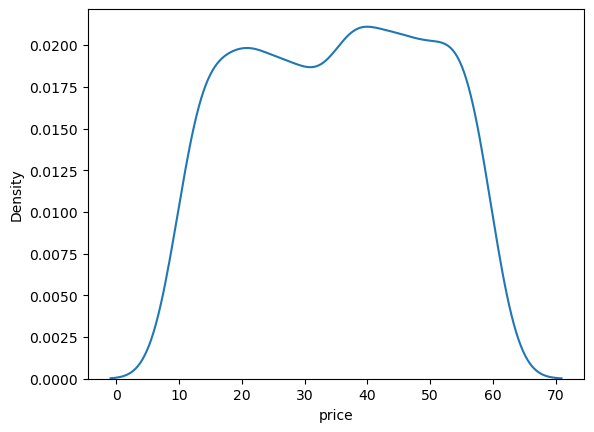

In [19]:
sns.distplot(df['price'], hist=False)

In [20]:
df['rating'].skew()

0.07421774724073499

# what is distribution of rating 1 to 5?

C:\Users\Admin\AppData\Local\Temp\ipykernel_4688\1027244895.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'], hist=False)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Density'>

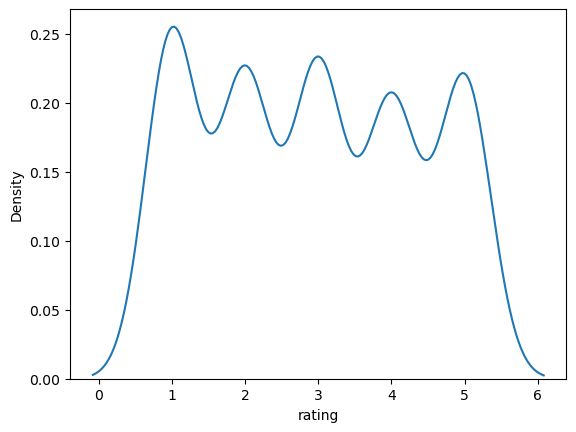

In [22]:
sns.distplot(df['rating'], hist=False)

In [23]:
df['availability'].value_counts()

availability
In stock    1000
Name: count, dtype: int64

# Is there a correlation between price and rating?

In [24]:
df[['price','rating']].corr()

,price,rating
price,1.000000,0.028166
rating,0.028166,1.000000


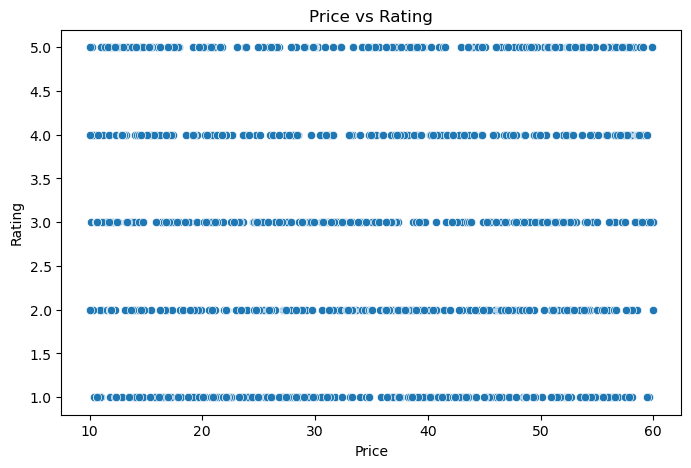

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price', y='rating', data=df)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

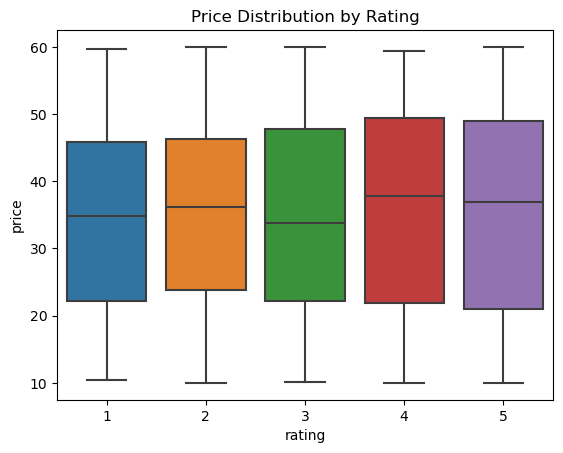

In [26]:
sns.boxplot(x='rating', y='price', data=df)
plt.title('Price Distribution by Rating')
plt.show()

# Task:3 visualisation

# Q: How many books are in stock ?

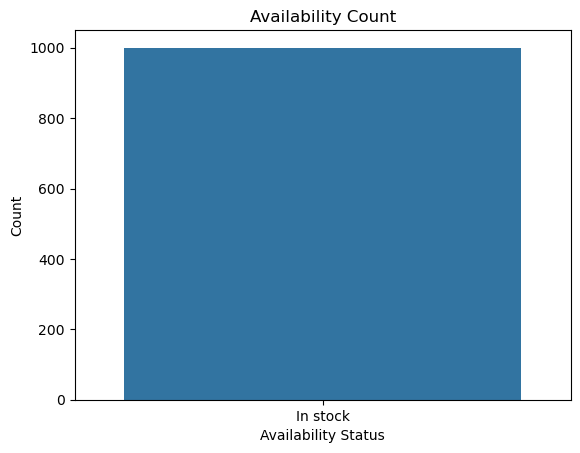

In [27]:
sns.countplot(x='availability',data=df)
plt.title('Availability Count')
plt.xlabel('Availability Status')
plt.ylabel('Count')
plt.show()

# how many books have a rating of 4 or above?

In [28]:
print(df[df['rating'] >= 4].shape[0])

375


In [44]:
df['rating'].value_counts()

rating
1    226
3    203
5    196
2    196
4    179
Name: count, dtype: int64

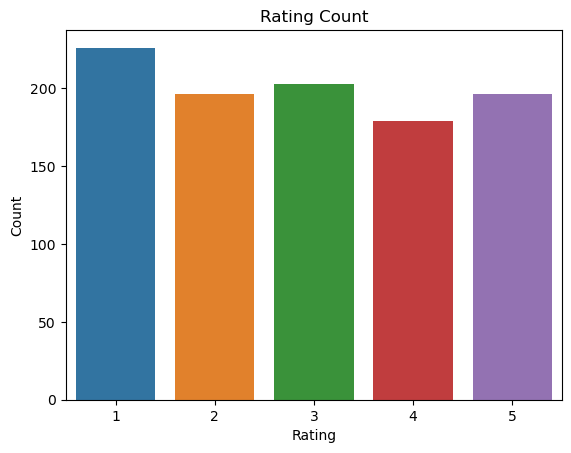

In [45]:
sns.countplot(x='rating',data=df)
plt.title('Rating Count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

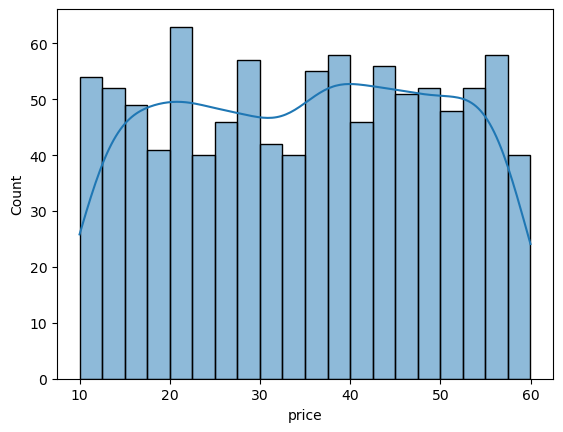

In [46]:
sns.histplot(df['price'],bins=20,kde=True)

# Q:top 5 rated books

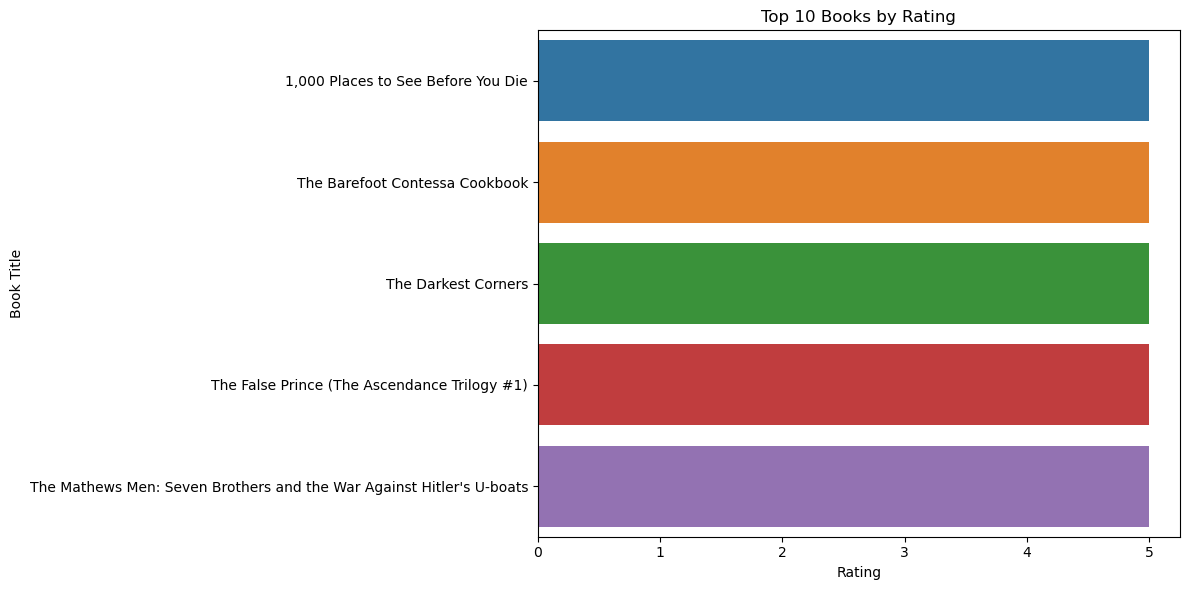

In [47]:
# Sort and get top 5 rated books
top_10_books = df.sort_values(by='rating', ascending=False).head(5)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='title', data=top_10_books,)
plt.title('Top 10 Books by Rating')
plt.xlabel('Rating')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

# Q:Top 10 1-star books

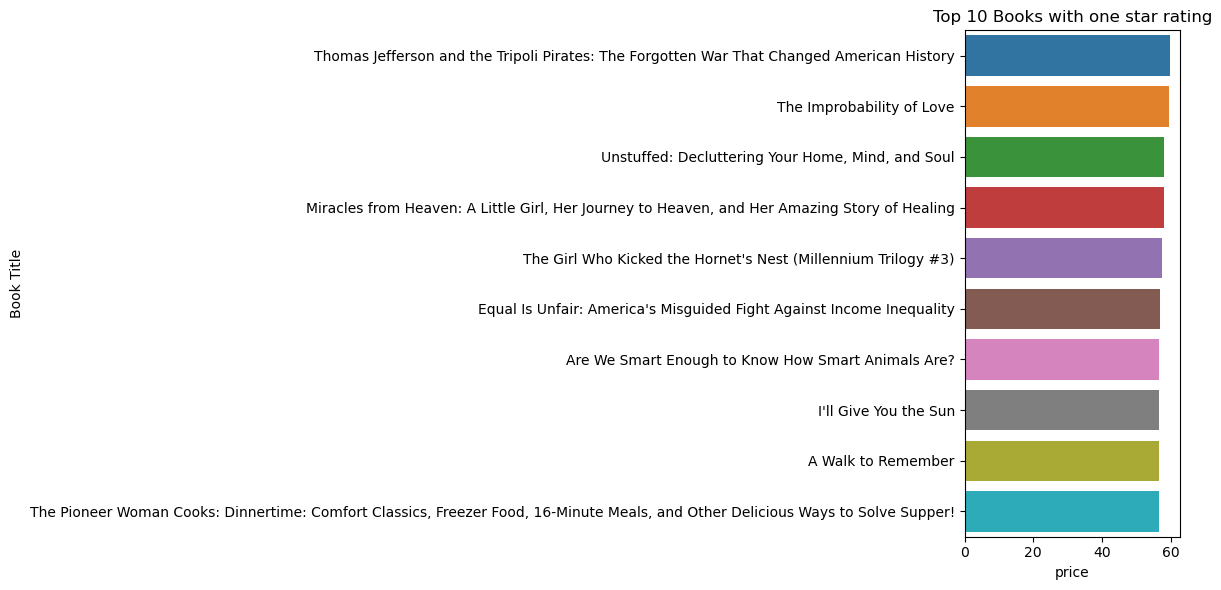

In [48]:
top_10_one_star = df[df['rating']==1.0].sort_values(by='price', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='title', data=top_10_one_star)
plt.title('Top 10 Books with one star rating')
plt.xlabel('price')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

In [53]:
df.head()

,title,price,currency,availability,rating
0,A Light in the Attic,51.77,£,In stock,3
1,Tipping the Velvet,53.74,£,In stock,1
2,Soumission,50.10,£,In stock,1
3,Sharp Objects,47.82,£,In stock,4
4,Sapiens: A Brief History of Humankind,54.23,£,In stock,5


# what is the average price of books?

In [55]:
average_price=df['price'].mean()
print(average_price)

35.07035


# what is most common rating?

In [21]:
common_rating=df['rating'].mode()
print(common_rating)

0    1
Name: rating, dtype: int64


# which book has the highest price?

In [62]:
highest_price_book=df[['price','title']].max()
print(highest_price_book)

price    59.99
title    salt.
dtype: object


# which book has the lowest price?

In [63]:
lowest_price_book=df[['price','title']].min()
print(lowest_price_book)

price                                                 10.0
title    "Most Blessed of the Patriarchs": Thomas Jeffe...
dtype: object


# what is the average price per rating level?

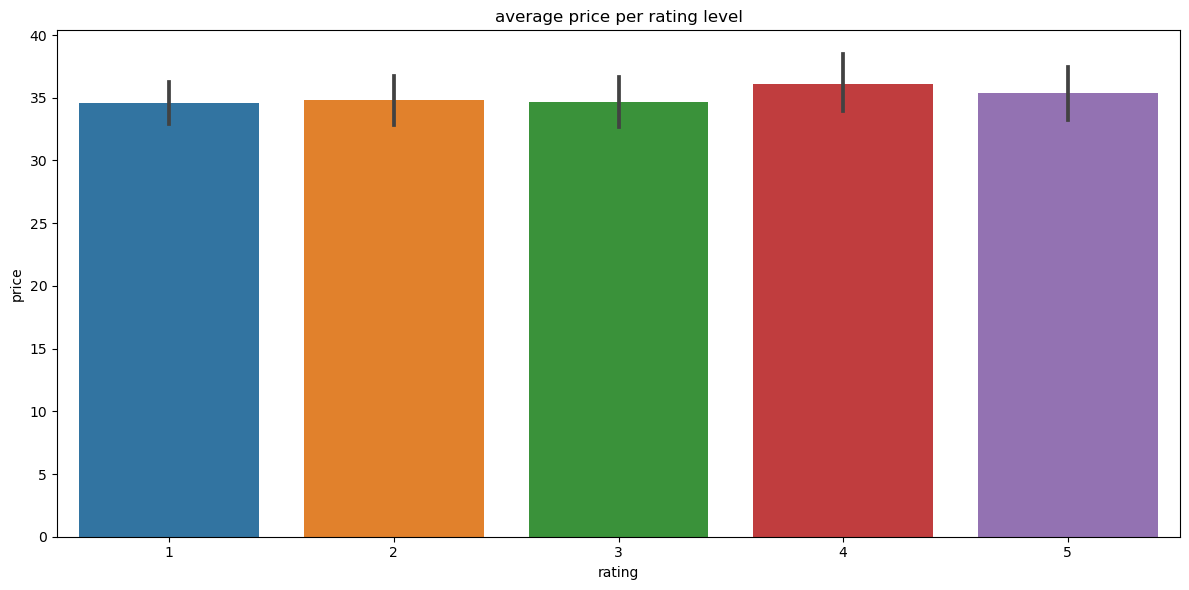

In [73]:
# Plot

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='price',data=df)
plt.title('average price per rating level')
plt.xlabel('rating')
plt.ylabel('price')
plt.tight_layout()
plt.show()

# rating with highest avg price

In [33]:
avg_price_per_rating = df.groupby('rating')['price'].mean()
print("Rating with highest avg price:", avg_price_per_rating.idxmax())


Rating with highest avg price: 4


# Most common rating

In [29]:
print(df['rating'].mode()[0])

1


# Number of books in stock

In [30]:
print(df[df['availability'] == 'In stock'].shape[0])

1000


In [31]:
# Book with highest and lowest price
print("Most expensive book:\n", df.loc[df['price'].idxmax()][['title', 'price']])
print("Cheapest book:\n", df.loc[df['price'].idxmin()][['title', 'price']])

Most expensive book:
 title    The Perfect Play (Play by Play #1)
price                                 59.99
Name: 648, dtype: object
Cheapest book:
 title    An Abundance of Katherines
price                          10.0
Name: 638, dtype: object


In [32]:
# Average price per rating level
print("Average price per rating level:\n", df.groupby('rating')['price'].mean())


Average price per rating level:
 rating
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: price, dtype: float64
